<h1>Existence and Uniqueness</h1>

<p>The basic model we have is a initial value problem of the type:</p>


$$
x'(t) = f(t, x), \quad x(t_0) = x_0.
$$


<p>Example,</p>


$$
x'(t) = a.
$$


<p>Here $f(t,x) = a$ for some constant $a$. We know that we can "integrate" to get $x(t) = at$. The formula for the velocity when acceleration is constant.</p>

<p>What about when there is a drag:</p>


$$
x'(t) = a - cx(t)
$$


<p>Then $f(t,x) = a-cx$. Is there a simple solution?</p>

<p>Fact: not all initial-value problems will have a solution.</p>

<p>Fact: even if there are solutions, they may blow up.</p>

<p>Let's see if the computer can help:</p>

In [1]:
using SymPy
u = SymFunction("u")
@vars x a c x0
f(t, u) = a - c*u
dsolve(u'(x) - f(x, u(x)), x, (u, 0, x0))  # dsolve(eqn, variable, (fn, x0, fn(x0))

<p>So here we have a solution, but we don't know its qualitative properties without more work.</p>

<p>This example from the book shows that solutions may not exist for all times $t$:</p>


$$
x' = 1 + x^2, \quad x(0) = 0
$$


<p>This has solution $\tan(x)$ on $(0,\pi/2)$, but blows up at $\pi/2$.</p>

<p>The argument goes: at $t=0$ $x'$ is positive, so $x$ increases, as such $x'$ increases too. So at a minimum this function will be concave up, but in this case it keeps increasing so that it blows up in finite time – the solution is $y=\tan(x)$.</p>

<p>Fact: There may be more than one solution!</p>

<p>Example from the book:</p>


$$
f(x) = x^{2/3}, \quad x(0) = 0
$$


<p>Here we find one with <code>SymPy</code></p>

In [1]:

dsolve(u'(x) - u(x)^(2//3), x, (u, 0, 0))

<p>So we get one solution, but do note here the constant function $y=0$ is <em>also</em> a solution.</p>

<h2>We can visualize</h2>

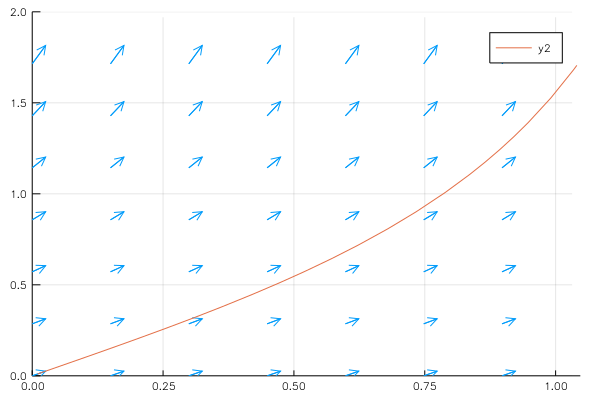

In [1]:
using Plots
F(t, u) = 1 + u^2
plot(VectorField(F), xlim=(0,pi/3), ylim=(0,2))
plot!(tan)

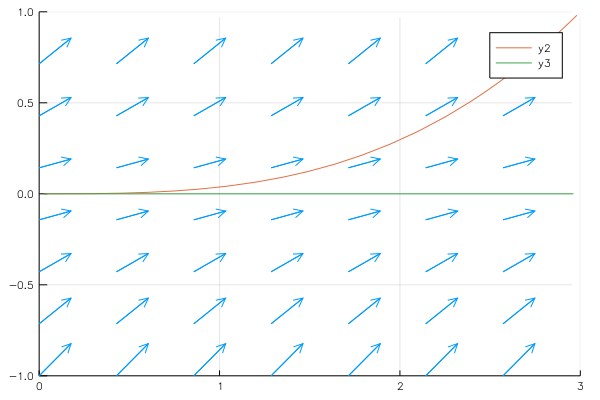

In [1]:
using Plots
F(t, u) = cbrt(u^2)
plot(VectorField(F), xlim=(0,3), ylim=(-1,1))
plot!(x->x^3/27)
plot!(zero)

<p>and</p>

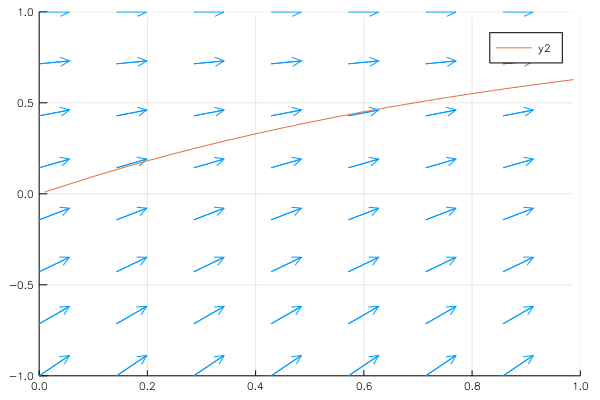

In [1]:
a, c, x0 = 1, 1, 0
f(x,u) = a - c*u
ex = dsolve(u'(x) - f(x, u(x)), x, (u, 0, x0))
plot(VectorField(f), xlim=(0,1), ylim=(-1,1))
plot!(lambdify(rhs(ex)))

<h3>Existence</h3>

<p>There are theorems that guarantee existence; theorems that guarantee uniqueness, and theorems that guarante <em>both</em> existence and uniqueness. These theorems must put some assumption on $f$.</p>

<blockquote>
<p>Thm 1. Existence theorem <a href="https://en.wikipedia.org/wiki/Peano_existence_theorem">Peano</a></p>
</blockquote>

<p>If $f$ is <em>continuous</em> on a rectangle centered at $(t_0, x_0)$, say:</p>


$$
R = \{ (t,x) : |t - t_0| \leq \alpha, |x - x_0| \leq \beta \}.
$$


<p>Then the inital value problem has a solution $x(t)$ for $|t - t_0| \leq min(\alpha, \beta/M)$ where $M$ maximizes $|f|$ in $R$.</p>

<p>Example: $f(t,x) = 1 + x^2$. This is continuous everywhere. On an interval of the form $R_{\alpha,\beta}$ centered at $(0,0)$, the maximum value of $f$ will be $1 + \beta^2$. So $\beta/M = \beta/(1 + beta^2)$ This is largest at $beta=1$ or $M=1/2$. So this guarantee only guarantees existence through $-1/2, 1/2$ for $t$, but it is wider – though we say that it does blow up by $t=\pi/2$.</p>

<h3>Uniqueness</h3>

<blockquote>
<p>Thm 2 (p526). If both $f$ and $\partial f/\partial x$ are <em>continuous</em> in R, then there is a unique solution for $|t - t_0| \leq min(\alpha, \beta/M)$</p>
</blockquote>

<p>Example: $f(t,x) = 1 + x^2$ had $\partial f/\partial x = 2x$ so is continuous. Hence the solution that exists will be unique – it just isn't good for all time $t$.</p>

<p>Exmaple: $f(t,x) = x^{2/3}$. As $\partial f/\partial x = (2/3)x^{-1/3}$ this function does <em>not</em> have a continuous derivative at $0$. So there is <em>no</em> uniquess guaranteed if started at $0$. However, if starting at t=1S, then there is.</p>

<h3>Existence and uniqueness</h3>

<blockquote>
<p>Thm 3 If f is Lipshitz then the intial value problem will have a unique solution in some interval. <a href="https://en.wikipedia.org/wiki/Picard&#37;E2&#37;80&#37;93Lindel&#37;C3&#37;B6f_theorem">Picard-Lindelof</a> theorm</p>
</blockquote>

<p>Precisely, if $f$ is continuous on the strip $a \leq t\leq b$ and $x \in (-\infy, \infty)$ <em>and</em> satisfies the following inequality for a fixed $L$:</p>


$$
| f(t,x_1) - f(t, x_2) | \leq L | x_1 - x_2|
$$


<p>then the solution exists on the interval $[a,b]$.</p>

<p>Note: this says $f$ is <em>Lipschitz</em> in the $x$ variable where the constant does not depend on $t$. For one-dimensional problems, Lipschitz is stronger than continuity but weaker than assuming a derivative. (If a derivative exists, it must be bounded by $L$.)</p>

<p>Example: For $f(t,x) = x^{2/3}$ this can't be around $x=0$ as the derivative blows up near $0$.</p>